# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Import the three datasets

In [2]:
Movies_data = pd.read_csv("C:\\Users\\hp\\Data\\Movies.csv", encoding='ISO-8859-1')

Ratings_data = pd.read_csv("C:\\Users\\hp\\Data\\Ratings.csv", encoding='ISO-8859-1')

Users_data = pd.read_csv("C:\\Users\\hp\\Data\\Users.csv", encoding='ISO-8859-1')

# Check the shape of all three DataFrame

In [3]:
Movies_data.shape

(3883, 3)

In [4]:
Ratings_data.shape

(1000209, 4)

In [5]:
Users_data.shape

(6040, 5)

# Merge the tables using two primary keys MovieID & UserId


In [6]:
Movie_Ratings = pd.merge(Ratings_data,Movies_data, on='MovieID')
User_Ratings = pd.merge(Ratings_data,Users_data, on='UserID')

# Create a new dataset Master_Data
(with the following columns MovieID Title UserID Age Gender Occupation Rating)

In [7]:
master_data = pd.merge(Movie_Ratings,User_Ratings )

master_data

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,M,56,16,70072
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,12,32793
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,7,22903
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,M,50,1,95350
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary,M,18,17,47901
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama,M,35,14,30030
1000206,5780,2845,1,958153068,White Boys (1999),Drama,M,18,17,92886
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,F,18,20,55410


In [8]:
#we can understand Zip-code and Timestamp is the least affected on ratings.

master_data = master_data.drop(['Zip-code', 'Timestamp'], axis=1)


master_data.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,M,56,16
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,12
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,7
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,M,50,1


In [9]:
master_data.to_csv("Master.csv")

# Datasets exploration using visual representations 

# 1. User Age Distribution

In [10]:
#Age is chosen from following ranges(1-"Under 18" ,18 -"18-24", 25- "25-34", 35- "35-44", 45- "45-49", 50-"50-55", 56-"56+")

In [11]:
# Number of users with Different Age Groups

master_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

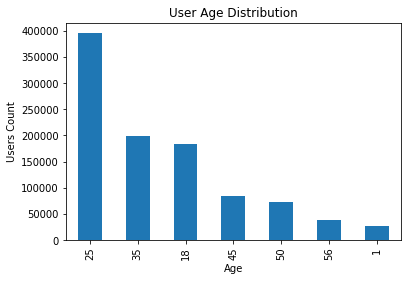

In [12]:
# Plot for users with different age groups

master_data['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

# 2. User rating of the movie “Toy Story”

In [13]:
#Check the movies of titile- Toy Story

toystory = master_data[master_data['Title'].str.contains('Toy Story ') == True]

toystory

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
41626,1,1,5,Toy Story (1995),Animation|Children's|Comedy,F,1,10
41627,6,1,4,Toy Story (1995),Animation|Children's|Comedy,F,50,9
41628,8,1,4,Toy Story (1995),Animation|Children's|Comedy,M,25,12
41629,9,1,5,Toy Story (1995),Animation|Children's|Comedy,M,25,17
41630,10,1,5,Toy Story (1995),Animation|Children's|Comedy,F,35,1
...,...,...,...,...,...,...,...,...
56826,6022,3114,5,Toy Story 2 (1999),Animation|Children's|Comedy,M,25,17
56827,6024,3114,4,Toy Story 2 (1999),Animation|Children's|Comedy,M,25,12
56828,6027,3114,4,Toy Story 2 (1999),Animation|Children's|Comedy,M,18,4
56829,6036,3114,4,Toy Story 2 (1999),Animation|Children's|Comedy,F,25,15


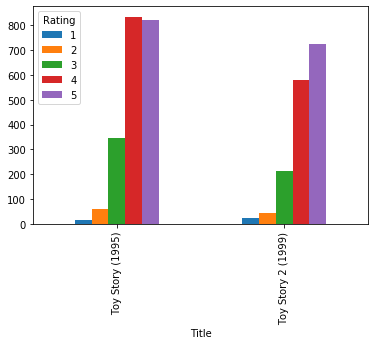

In [14]:
toystory.groupby(["Title","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)

plt.show()

In [15]:
toystory = toystory.groupby(["Title","Rating"]).size()

toystory

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

# 3. Top 25 movies by viewership rating

In [16]:
#Top25 movies with its rating

Top25 = master_data.groupby('Title')['Rating'].mean().sort_values(ascending=False)

Top25.head(25)

Title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [17]:
#Top25 movies with its rating count

Topcount = master_data.groupby('Title')['Rating'].count().sort_values(ascending=False)

Topcount.head(25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [18]:
avg_rating = pd.DataFrame(data=Top25)
avg_rating['number of ratings'] = pd.DataFrame(Topcount)

avg_rating.head(25)

,Rating,number of ratings
Title,,
"Gate of Heavenly Peace, The (1995)",5.000000,3
Lured (1947),5.000000,1
Ulysses (Ulisse) (1954),5.000000,1
Smashing Time (1967),5.000000,2
Follow the Bitch (1998),5.000000,1
Song of Freedom (1936),5.000000,1
Bittersweet Motel (2000),5.000000,1
"Baby, The (1973)",5.000000,1
One Little Indian (1973),5.000000,1


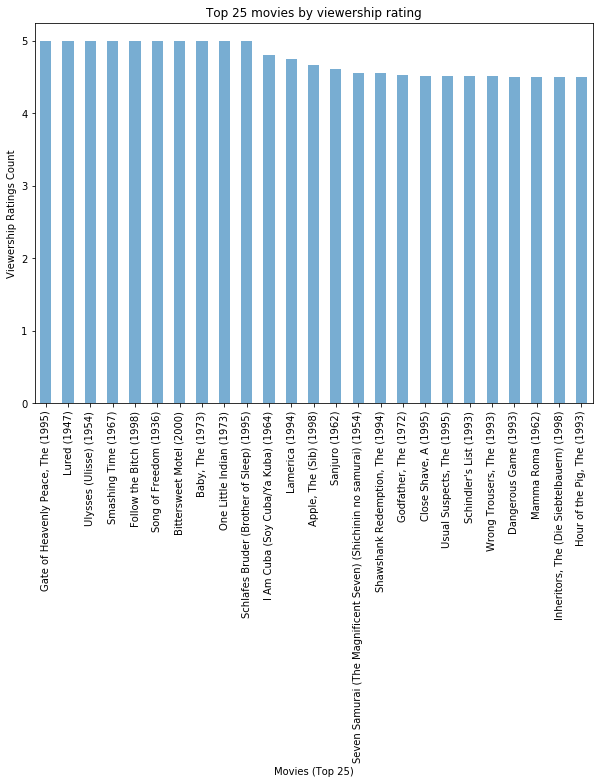

In [19]:
Top25[:25].plot(kind='bar',alpha=0.6,figsize=(10,7))

plt.xlabel("Movies (Top 25)")
plt.ylabel("Viewership Ratings Count")
plt.title("Top 25 movies by viewership rating")
plt.show()

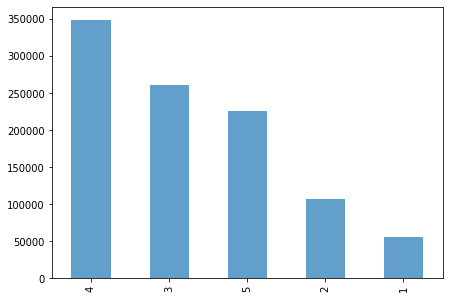

In [20]:
#Visualize overall rating by users
master_data['Rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(7,5))
plt.show()

# 4. Ratings for all the movies reviewed by for a particular user of user id = 2696

In [21]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

user_2696 = master_data[master_data['UserID'] == 2696]
user_2696

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
24345,2696,1270,2,Back to the Future (1985),Comedy|Sci-Fi,M,25,7
29848,2696,1097,3,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,M,25,7
244232,2696,1617,4,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,M,25,7
250014,2696,800,5,Lone Star (1996),Drama|Mystery,M,25,7
273633,2696,3386,1,JFK (1991),Drama|Mystery,M,25,7
277808,2696,3176,4,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,M,25,7
371178,2696,1711,4,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,M,25,7
377250,2696,1589,3,Cop Land (1997),Crime|Drama|Mystery,M,25,7
598042,2696,1783,4,Palmetto (1998),Film-Noir|Mystery|Thriller,M,25,7
603189,2696,1892,4,"Perfect Murder, A (1998)",Mystery|Thriller,M,25,7


# Feature Engineering

In [22]:
#Use column genres:

master_data['Genres'].value_counts()

Comedy                       116883
Drama                        111395
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Créa la Femme) (1956)            28
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 302, dtype: int64

# 1. The unique genres 
Split the data in column genre making a list and process the data to find out only the unique categories of genres


In [23]:
dfGenres = master_data['Genres'].str.split("|")

listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))


In [24]:
# All Unique genres

listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Créa la Femme) (1956)',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# 2. Genre category with a one-hot encoding ( 1 and 0)

In [25]:
movie_Genre = master_data['Genres']
movie_Genre = movie_Genre.str.get_dummies()

movie_Genre

,Action,Adventure,Animation,Children's,Comedy,Crime,Créa la Femme) (1956),Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1000205,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1000206,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1000207,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [26]:
movie_Genre.columns

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Créa la Femme) (1956)', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [27]:
master_data = master_data.drop(['Genres'], axis=1)

master_data = pd.concat([master_data, movie_Genre],axis=1, )

master_data.dtypes

UserID                    int64
MovieID                   int64
Rating                    int64
Title                    object
Gender                   object
Age                       int64
Occupation                int64
Action                    int64
Adventure                 int64
Animation                 int64
Children's                int64
Comedy                    int64
Crime                     int64
Créa la Femme) (1956)     int64
Documentary               int64
Drama                     int64
Fantasy                   int64
Film-Noir                 int64
Horror                    int64
Musical                   int64
Mystery                   int64
Romance                   int64
Sci-Fi                    int64
Thriller                  int64
War                       int64
Western                   int64
dtype: object

# 3. Features affecting the ratings of any particular movie

In [28]:
#We can uderstand rating is a dependent variable on some independent variable such as Gender, Age, Occupation, Genre.


In [29]:
master_data['Gender'] = master_data.Gender.str.replace('F','1')

master_data['Gender'] = master_data.Gender.str.replace('M','0')

master_data['Gender'] = master_data.Gender.astype(int)

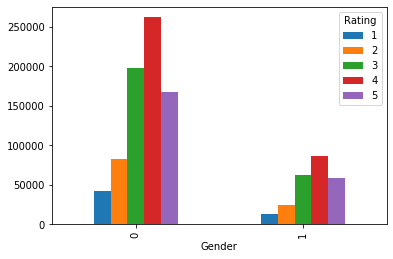

In [30]:
# Visualization of Gender affect on ratings.

master_data.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

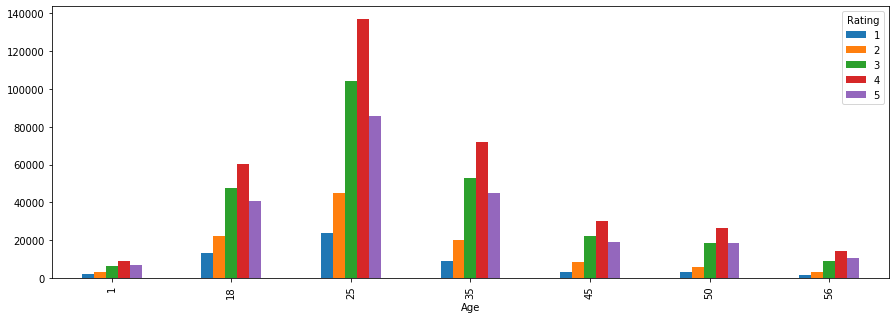

In [31]:
# Visualization of Age affect on ratings.

master_data.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True, figsize=(15,5))
plt.show()

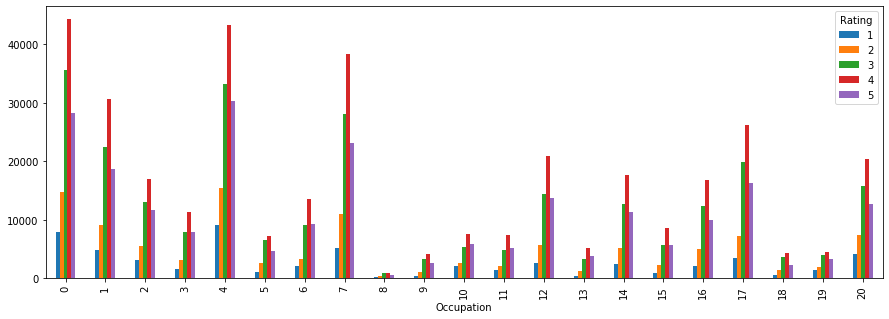

In [32]:
# Visualization of occupation affect on ratings.

master_data.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True, figsize=(15,5))
plt.show()


# 4. Model to predict the movie ratings

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

lineReg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
master_data_sample = master_data.sample(n=50000, random_state=0)
master_data_sample.head()

,UserID,MovieID,Rating,Title,Gender,Age,Occupation,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
324271,1996,2406,4,Romancing the Stone (1984),0,35,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
818637,921,2071,4,And the Band Played On (1993),0,25,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148677,323,3809,4,What About Bob? (1991),0,45,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778790,346,1390,4,My Fellow Americans (1996),1,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525489,4004,3175,2,Galaxy Quest (1999),0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
X = master_data_sample[master_data_sample.columns[master_data_sample.columns.isin(["Rating"])]]
y = master_data_sample.Rating

X = X.apply(pd.to_numeric, errors='coerce')
Y = y.apply(pd.to_numeric, errors='coerce')

In [36]:
from sklearn.linear_model import LinearRegression



In [37]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)


In [38]:
 reg = LinearRegression().fit(X, y)
#we predict scores on one variable from the scores on a second variable.
reg.score(X, y)

1.0

In [39]:
#The intercept (often labeled as constant) is the point where the function crosses the y-axis.
reg.intercept_

5.648814749292796e-13

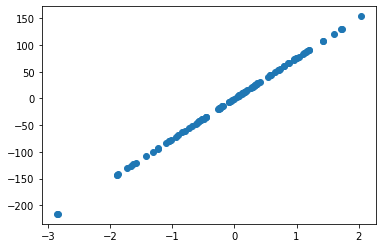

In [48]:

from sklearn.datasets import make_regression
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)


# fit final model
model = LinearRegression()
model.fit(X, y)

# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

In [50]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

0.0061831072706279855
[75.67273634]


In [53]:
# make a prediction
y = model.predict(X)

In [2]:
#Now compare the actual output values for X with the predicted values, execute the following script:

# show the inputs and predicted outputs
df = pd.DataFrame({'Actual': X.flatten(), 'Predicted': y.flatten()})


In [59]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier